In [1]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()

# Check the keys to understand the structure of the data
print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
# Features (data)
X = iris.data
# Target labels (species)
y = iris.target

# Feature names
feature_names = iris.feature_names
print(f"Feature Names: {feature_names}")

# Target names (species)
target_names = iris.target_names
print(f"Target Names: {target_names}")

# Sample Data
print(f"First 5 samples:\n{X[:5]}")
print(f"Corresponding target labels:\n{y[:5]}")


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
First 5 samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Corresponding target labels:
[0 0 0 0 0]


In [4]:
import pandas as pd

# Create a DataFrame using features and target
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Show the first few rows of the dataset
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


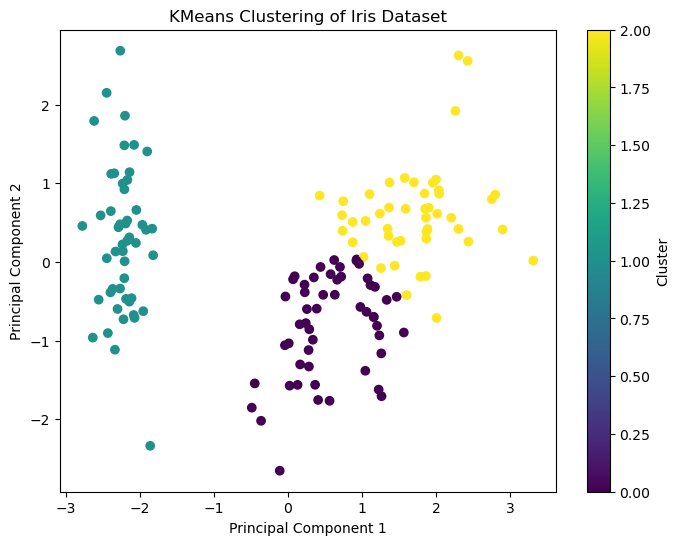

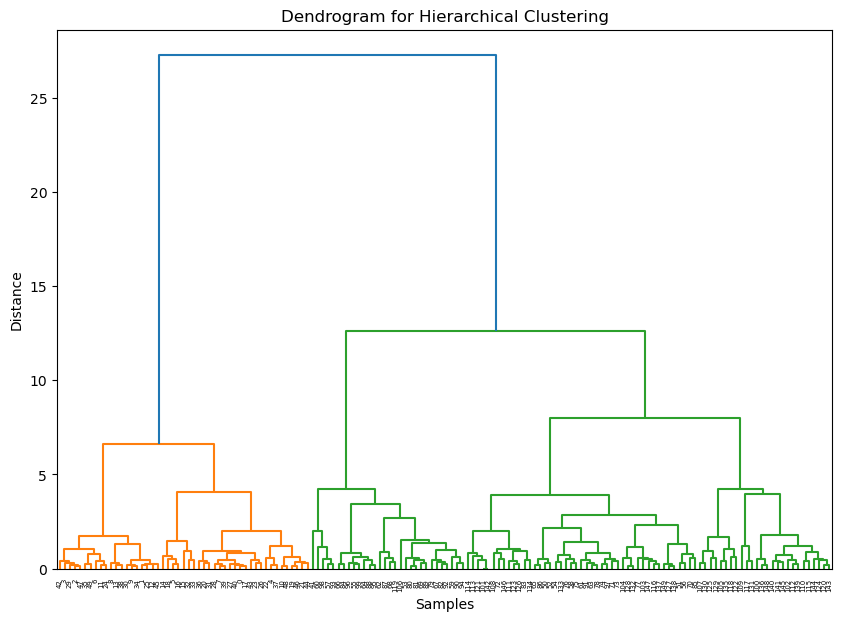

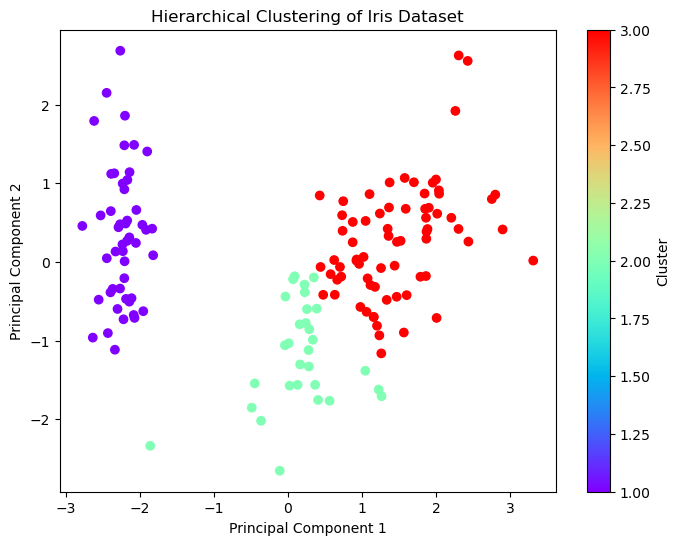

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

# Suppress warnings related to joblib's Loky backend (if you're not concerned about the performance impact)
warnings.filterwarnings("ignore", category=UserWarning, message="Could not find the number of physical cores")

# Step 1: Loading and Preprocessing the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2A: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

# 2A. Visualize the KMeans clusters using PCA (for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', label="KMeans Clusters")
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 2B: Hierarchical Clustering
Z = linkage(X_scaled, 'ward')

# 2B. Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram to get 3 clusters
from scipy.cluster.hierarchy import fcluster
labels_hierarchical = fcluster(Z, t=3, criterion='maxclust')

# Visualize the Hierarchical Clustering result using PCA (for 2D visualization)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hierarchical, cmap='rainbow', label="Hierarchical Clusters")
plt.title('Hierarchical Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
